In [ ]:
import os
import glob
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers


# to ensure reproducibility of results
tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip clothing-dataset-small.zip

Archive:  clothing-dataset-small.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of clothing-dataset-small.zip or
        clothing-dataset-small.zip.zip, and cannot find clothing-dataset-small.zip.ZIP, period.


### **Data Preprocessing**

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/test", shuffle = False,
)

In [ ]:
height, width = 128, 128       # optional value

In [ ]:
data_preprocess = keras.Sequential(
                        name="data_preprocess",
                        layers=[
                            layers.Resizing(height, width),   # Shape Preprocessing
                            layers.Rescaling(1.0/255),     # Value Preprocessing
                        ]
                  )

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
num_classes = 10
hidden_layer_cnn = 256

model = keras.Sequential(
                name='CNN_Model',
                layers=[
                      layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height, width, 3)),
                      layers.MaxPooling2D(),
                      layers.Flatten(),
                      layers.Dense(hidden_layer_cnn, activation='relu'),
                      layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4775 - loss: 1.6210 - val_accuracy: 0.5220 - val_loss: 1.5186
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6786 - loss: 1.0492 - val_accuracy: 0.5777 - val_loss: 1.3596
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8232 - loss: 0.6357 - val_accuracy: 0.5982 - val_loss: 1.3681
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9181 - loss: 0.3500 - val_accuracy: 0.6100 - val_loss: 1.5331
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9614 - loss: 0.2071 - val_accuracy: 0.6276 - val_loss: 1.4893
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9812 - loss: 0.1284 - val_accuracy: 0.5718 - val_loss: 1.7178
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9914 - loss: 0.0744 - val_accuracy: 0.5982 - val_loss: 1.7668
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9983 - loss: 0.0476 - val_accuracy: 0.6188

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

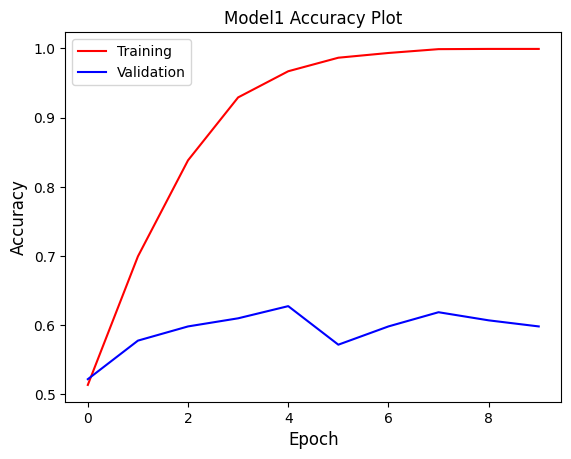

In [ ]:
acc_plot(model_fit)

**Performance on Test Data**

In [ ]:
y_pred = model.predict(test_ds)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


array([[9.2731977e-01, 2.2201501e-03, 4.5396634e-03, ..., 2.5532406e-03,
        1.3747066e-03, 3.0165287e-02],
       [8.9102447e-01, 1.6914414e-03, 6.5412064e-04, ..., 2.7172091e-05,
        1.9013624e-03, 1.5441899e-02],
       [3.3278805e-01, 3.2369107e-01, 8.0758013e-02, ..., 1.6572751e-03,
        4.6540160e-02, 1.4401604e-01],
       ...,
       [9.4619128e-07, 2.4097190e-07, 1.7044865e-06, ..., 4.7877116e-09,
        5.7551774e-06, 9.9999034e-01],
       [3.5554025e-02, 6.4404253e-03, 1.8691165e-02, ..., 6.2501431e-03,
        4.6954107e-02, 4.3787977e-01],
       [9.4015986e-06, 9.3159304e-07, 1.9161291e-01, ..., 9.3927792e-06,
        1.3269404e-06, 8.0809802e-01]], dtype=float32)

In [ ]:
# get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_ds], axis=0)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 51.88172043010753


- Here we see the problem of overfitting
- These results are better than MLP but far from perfect

### How to reduce overfitting?
There are broadly two ways in which we can reduce overfitting -
1. Modifications in Model Pipeline: Improving Network Configuration to solve over-parametrization
2. Modifications in Data Pipeline: Augmenting Dataset to increase the number of samples

#### 1. Modifications in the Model Pipeline:
- Our base model has ~17 million parameters and only 3000 images for training.
- This results in overparamterization of the network making it prone to overfit.
- This problem can be tackled by removing some layers from the network.

**But as our model is already small, let's check the summary of the model**
**Observation:**
- Over ~99% of the parameters are associated with just one layer, and that is not even the Convolutional layer.
- The number of trainable parameters are approximately 1000 times less than that of the Dense Layers in the architecture.

- Flattening the 3D matrix into 1D increases the number of connections from that layer to dense layer.
- In order to avoid this, we will do two things:
   - Reduce the 3D volume before the flatten layer by using more Convolution blocks.
   - Replace the flatten layer by GlobalAveragePool

#### Modification 1:

In [ ]:
def model1(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model1",
        layers=[

            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            layers.GlobalAveragePooling2D(),

            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = model1()

In [ ]:
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,970 (1.76 MB)

 Trainable params: 460,970 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ModelCheckpoint = keras.callbacks.ModelCheckpoint(filepath='tf_model.weights.h5', save_weights_only=True,
                                                  monitor='val_accuracy', mode='max', save_best_only=True),

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[ModelCheckpoint])

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.2547 - loss: 2.1631 - val_accuracy: 0.2375 - val_loss: 2.1508
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2641 - loss: 2.1040 - val_accuracy: 0.2375 - val_loss: 2.1467
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.2650 - loss: 2.1021 - val_accuracy: 0.2375 - val_loss: 2.1210
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2863 - loss: 2.0592 - val_accuracy: 0.3050 - val_loss: 2.0291
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.3542 - loss: 1.9168 - val_accuracy: 0.3519 - val_loss: 1.8643
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.3828 - loss: 1.7653 - val_accuracy: 0.3607 - val_loss: 1.8608
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.4093 - loss: 1.6992 - val_accuracy: 0.4194 - val_loss: 1.6860
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.4425 - loss: 1.5869 - val_accuracy: 0.434

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

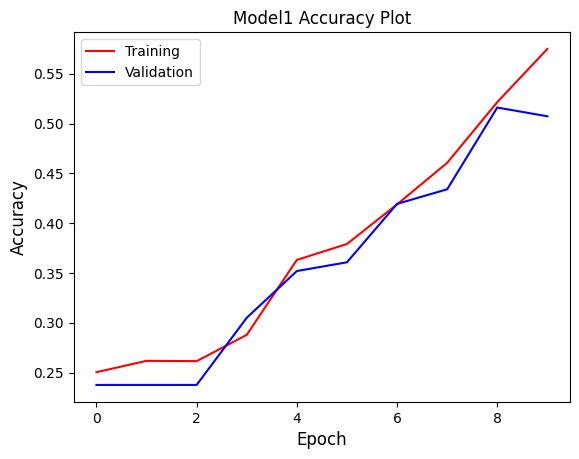

In [ ]:
acc_plot(model_fit)

With just two modifications in the architecture, the model starts performing much better and the problem of overfitting vanish.

#### Increasing the number of epochs as the model starts performing better

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[ModelCheckpoint])

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.6122 - loss: 1.1503 - val_accuracy: 0.6129 - val_loss: 1.1698
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6673 - loss: 0.9866 - val_accuracy: 0.6188 - val_loss: 1.1362
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.6942 - loss: 0.9187 - val_accuracy: 0.6334 - val_loss: 1.0904
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.7162 - loss: 0.8405 - val_accuracy: 0.6041 - val_loss: 1.0887
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.7306 - loss: 0.7576 - val_accuracy: 0.6804 - val_loss: 0.9676
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7705 - loss: 0.6776 - val_accuracy: 0.6364 - val_loss: 1.0637
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7841 - loss: 0.6264 - val_accuracy: 0.6364 - val_loss: 1.2008
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7934 - loss: 0.5827 - val_accuracy: 0.6628

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

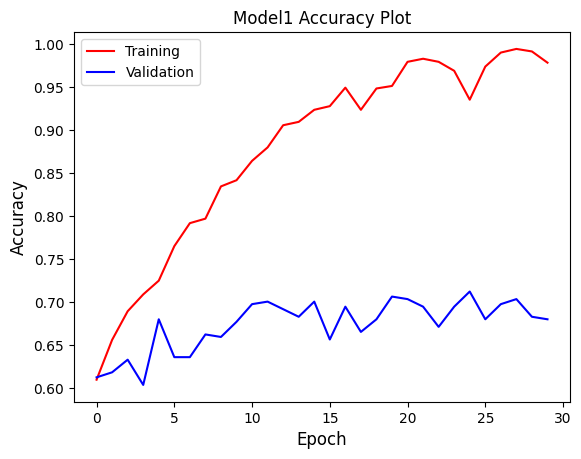

In [ ]:
acc_plot(model_fit)

#### Modification 2:
- Add Batch Normalization after every Conv2D and Dense layers
- Add Dropout after Dense layers

In [ ]:
def model2(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model2",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=32, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=64, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=128, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=256, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.GlobalAveragePooling2D(),

            layers.Dense(units=hidden_size),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = model2()

In [ ]:
model.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ModelCheckpoint = keras.callbacks.ModelCheckpoint(filepath='tf_model.weights.h5', save_weights_only=True,
                                                  monitor='val_accuracy', mode='max', save_best_only=True),

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[ModelCheckpoint])

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.1988 - loss: 2.9611 - val_accuracy: 0.2375 - val_loss: 2.5396
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.3014 - loss: 2.2919 - val_accuracy: 0.2375 - val_loss: 2.7353
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.3709 - loss: 2.0372 - val_accuracy: 0.3021 - val_loss: 2.5645
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4570 - loss: 1.7084 - val_accuracy: 0.3695 - val_loss: 1.9932
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.5155 - loss: 1.5602 - val_accuracy: 0.4780 - val_loss: 1.5569
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5509 - loss: 1.3763 - val_accuracy: 0.5220 - val_loss: 1.4683
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6179 - loss: 1.1624 - val_accuracy: 0.5367 - val_loss: 1.3131
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6490 - loss: 1.0641 - val_accuracy: 0.6100

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

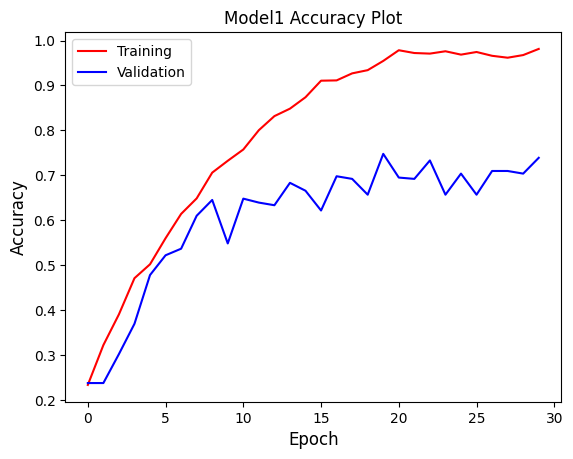

In [ ]:
acc_plot(model_fit)

A lot of fluctuations are observed in the validation accuracy. Therefore, a better alternative is to change the learning rate and let the model train until the loss/accuracy curve flattens out (also called Early Stopping)

#### Modification 3:
- Use a Learning Rate Scheduler
- Early Stopping callback

In [ ]:
model = model2()

In [ ]:
callbacks = [
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5,
                                          min_lr=0.00001),
        keras.callbacks.ModelCheckpoint(filepath='tf_model.weights.h5', save_weights_only=True,
                                        monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10,
                                      min_delta=0.001, mode='min')
        ]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=10,  callbacks=callbacks)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.3738 - loss: 2.0652 - val_accuracy: 0.3167 - val_loss: 2.4793 - learning_rate: 0.0010
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4542 - loss: 1.7287 - val_accuracy: 0.3402 - val_loss: 2.0852 - learning_rate: 0.0010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5185 - loss: 1.4945 - val_accuracy: 0.4545 - val_loss: 1.6099 - learning_rate: 0.0010
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.5832 - loss: 1.2787 - val_accuracy: 0.5367 - val_loss: 1.4323 - learning_rate: 0.0010
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6330 - loss: 1.1323 - val_accuracy: 0.3490 - val_loss: 2.7360 - learning_rate: 0.0010
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6615 - loss: 1.0140 - val_accuracy: 0.5894 - val_loss: 1.2343 - learning_rate: 0.0010
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7214 - loss: 0.8212 - val

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

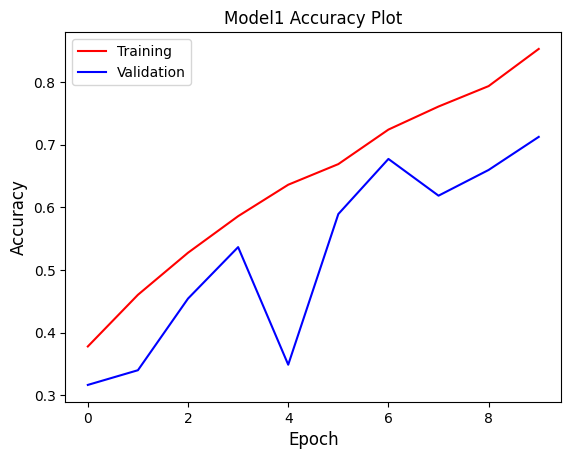

In [ ]:
acc_plot(model_fit)

#### Modification 4:
- Add L2 regularization to Conv2D and Dense layers

In [ ]:
def model3(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model3",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3),
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=128, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.GlobalAveragePooling2D(),

            layers.Dense(units=hidden_size, kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = model3()

In [ ]:
model.summary()

Model: "model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
callbacks = [
              keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001),
              keras.callbacks.ModelCheckpoint(filepath='tf_model.weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
              keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=0.001, mode='min')
            ]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=50,  callbacks=callbacks)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.1877 - loss: 3.5683 - val_accuracy: 0.0293 - val_loss: 3.1058 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.3438 - loss: 2.8018 - val_accuracy: 0.2053 - val_loss: 3.7194 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3888 - loss: 2.5418 - val_accuracy: 0.2493 - val_loss: 3.3351 - learning_rate: 0.0010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4764 - loss: 2.2338 - val_accuracy: 0.3754 - val_loss: 2.5165 - learning_rate: 0.0010
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5184 - loss: 2.0760 - val_accuracy: 0.3754 - val_loss: 2.4369 - learning_rate: 0.0010
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.5730 - loss: 1.9002 - val_accuracy: 0.4604 - val_loss: 2.1232 - learning_rate: 0.0010
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6279 - loss: 1.6782 - va

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

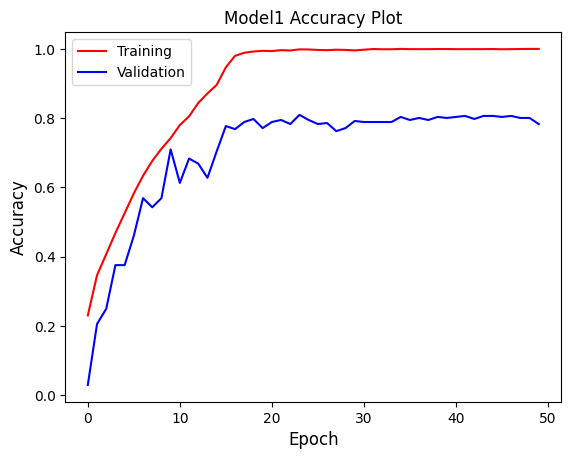

In [ ]:
acc_plot(model_fit)

### **Observation:**
Modifications in the model architecture leads to the better accuracy and loss in both training and validation datasets.

#### 2. Modifications in Data Pipeline:

#### Modification 5:
- Data Augmentation

In [ ]:
height, width = 156, 156
target_height, target_width = 128, 128

In [ ]:
data_preprocess = keras.Sequential(
                        name="data_augmentation",
                        layers=[
                            layers.Resizing(height, width),                 # Shape Preprocessing
                            layers.RandomCrop(target_height, target_width), # Then randomly crop 128,128 region
                            layers.Rescaling(1.0/255),                      # Value Preprocessing
                        ]
                  )

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
model = model3()

In [ ]:
model.summary()

Model: "model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [
              keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001),
              keras.callbacks.ModelCheckpoint(filepath='tf_model.weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
              keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=0.001, mode='min')
            ]

In [ ]:
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=50,  callbacks=callbacks)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.2031 - loss: 3.5272 - val_accuracy: 0.2375 - val_loss: 3.6163 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.3156 - loss: 2.9616 - val_accuracy: 0.2375 - val_loss: 4.2898 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.3528 - loss: 2.6979 - val_accuracy: 0.2874 - val_loss: 3.6698 - learning_rate: 0.0010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.4089 - loss: 2.4158 - val_accuracy: 0.3167 - val_loss: 2.9558 - learning_rate: 0.0010
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.4369 - loss: 2.2997 - val_accuracy: 0.4223 - val_loss: 2.2192 - learning_rate: 0.0010
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4986 - loss: 2.1154 - val_accuracy: 0.4516 - val_loss: 2.2065 - learning_rate: 0.0010
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5281 - loss: 1.9854 - va

In [ ]:
def acc_plot(model):
    params_cnn = model.params
    history_cnn = model.history

    plt.plot(range(0,params_cnn['epochs']), history_cnn['accuracy'], label='Training', color='r')
    plt.plot(range(0,params_cnn['epochs']), history_cnn['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

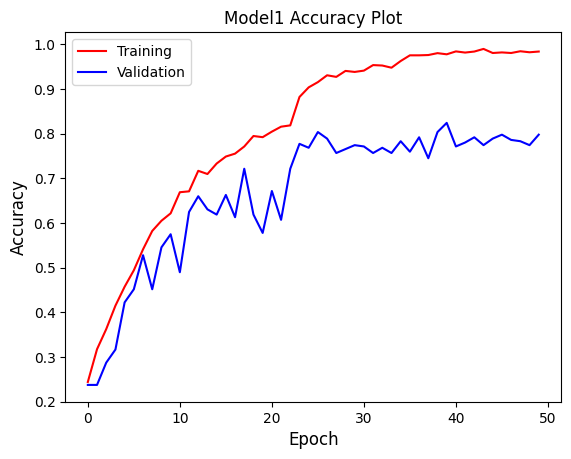

In [ ]:
acc_plot(model_fit)

It can be seen that by augmenting the data, the training accuracy becomes 98% and the validation accuracy reaches 79%.

## **Summary :**
How to reduce overfitting-

- Batch Normalization
- Dropout
- Callbacks
- L2 Regularization
- Data Augmentation Techniques